# Heart Disease Prediction

#### 1. Importing libraries

In [338]:
import pandas as pd

#### 2. importing dataset

In [339]:
data = pd.read_csv('heart.csv')

In [340]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


#### 4. missing values handling

In [341]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [342]:
data.shape

(1025, 14)

In [343]:
data_dup  = data.duplicated().any()
data_dup

True

In [344]:
data = data.drop_duplicates()

In [345]:
data_dup  = data.duplicated().any()
data_dup

False

In [346]:
data.shape

(302, 14)

#### 5. Data processing

In [347]:
cate_val=[]
cont_val=[]

for col in data.columns:
    if data[col].nunique() <= 10:
        cate_val.append(col)
    else:
        cont_val.append(col)

In [348]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [349]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### 6. Encoding categorical Data

In [350]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [351]:
data_cate = data[cate_val]
data_cate.head(10)

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,0,0,1,0,2,2,3,0
1,1,0,1,0,1,0,0,3,0
2,1,0,0,1,1,0,0,3,0
3,1,0,0,1,0,2,1,3,0
4,0,0,1,1,0,1,3,2,0
5,0,0,0,0,0,1,0,2,1
6,1,0,0,2,0,0,3,1,0
7,1,0,0,0,1,1,1,3,0
8,1,0,0,0,0,2,0,3,0
9,1,0,0,0,1,1,2,2,0


In [352]:
print(data['sex'].unique())
print(data['fbs'].unique())
print(data['exang'].unique())
print(data['target'].unique())

[1 0]
[0 1]
[0 1]
[0 1]


In [353]:
cate_val.remove('sex')
cate_val.remove('fbs')
cate_val.remove('exang')
cate_val.remove('target')

In [354]:
cate_val

['cp', 'restecg', 'slope', 'ca', 'thal']

In [355]:
data = pd.get_dummies(data, columns=cate_val, drop_first=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


#### 7. Feature Scaling

In [356]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [357]:
from sklearn.preprocessing import StandardScaler

In [358]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [359]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,0,0,...,0,1,0,0,0,1,0,0,1,0


#### 8. Splitting the dataset into the training sen & Testing Set

In [360]:
X = data.drop('target', axis=1)
y = data['target']

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 9. Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [365]:
y_pred1 = log.predict(X_test)

In [366]:
from sklearn.metrics import accuracy_score

In [367]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

#### 10. SVC

In [368]:
from sklearn import svm

In [369]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [370]:
y_pred2 = svm.predict(X_test)

In [371]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

#### 11. Kneighbor Classifier

In [372]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [374]:
y_pred3 = knn.predict(X_test)

In [375]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [376]:
score=[]
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=  knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [377]:
score #.index(max(score))

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [378]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred=  knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8032786885245902

## --> non-linear ML algorithms

##### - for this, we are not required to encode data and preprocess it. So we are importing dataset again

In [379]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [380]:
data = data.drop_duplicates()

In [381]:
X = data.drop('target', axis=1)
y = data['target']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 12. Decision Tree Classifier

In [383]:
from sklearn.tree import DecisionTreeClassifier

In [384]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [385]:
y_pred4 = dt.predict(X_test)

In [386]:
accuracy_score(y_test, y_pred4)

0.7377049180327869

#### 13. Random Forest Classifier

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [389]:
y_pred5 = rf.predict(X_test)

In [390]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

#### 14. Gradient Boosting Classifier

In [391]:
from sklearn.ensemble import GradientBoostingClassifier

In [392]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [393]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [394]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'], 'Accuracy': [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred4), accuracy_score(y_test, y_pred5), accuracy_score(y_test, y_pred6)]})

In [395]:
final_data

,Models,Accuracy
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RF,0.836066
5,GB,0.803279


In [396]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='Accuracy'>

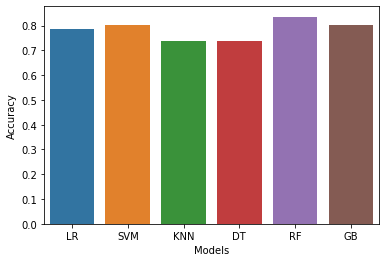

In [397]:
sns.barplot(x=final_data['Models'], y=final_data['Accuracy'])

In [398]:
X = data.drop('target', axis=1)
y = data['target']

In [399]:
from sklearn.ensemble import RandomForestClassifier

In [400]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

#### 15. Prediction on new Data

In [401]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1, 
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3
}, index=[0])

In [402]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [403]:
p = rf.predict(new_data)

if p[0] == 0:
    print("No-Disease")
else:
    print("Disease")

No-Disease


#### 16. Save model using Joblib

In [404]:
import joblib

In [405]:
joblib.dump(rf, 'Heart_disease_prediction')

['Heart_disease_prediction']

In [406]:
model = joblib.load('heart_disease_prediction')

In [407]:
model.predict(new_data)

array([0], dtype=int64)